# Le package pandas

Il s'agit d'un package qui offre des outils permettant d'analyser des données

### Nous analyserons ici les données sur le titanic

In [2]:
# Importation des bibliothèques

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importation
data = pd.read_excel('titanic3.xls')
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
# Dimension du dataframe
data.shape

(1309, 14)

In [5]:
# Les colonnes
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
# Elimination des colonnes non utiles
df = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis = 1)

In [8]:
df.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [9]:
# Les statisques de base pour chacune des colonnes
df.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [10]:
# Dans le classe age, il y a des données manquantes. Il y a deux options
# option 1:Les remplacer par des données par défaut grâce à la fonction fiilna, dans ce cas on modifie la réalité
# Procédé: df.fillna(df['age'].mean())
# option 2: supprimer les lignes ayant des données manquantes, dans ce cas on ne modifie pas la réalité, mais on perd des donnée
# procédé: df.dropna(axis = 0)

dff = df.dropna(axis = 0)
dff.shape

(1046, 4)

In [11]:
dff.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [13]:
# Nombre de passagers par classe
classes = dff.value_counts(['pclass'])
classes

pclass
3         501
1         284
2         261
dtype: int64

<AxesSubplot:xlabel='pclass'>

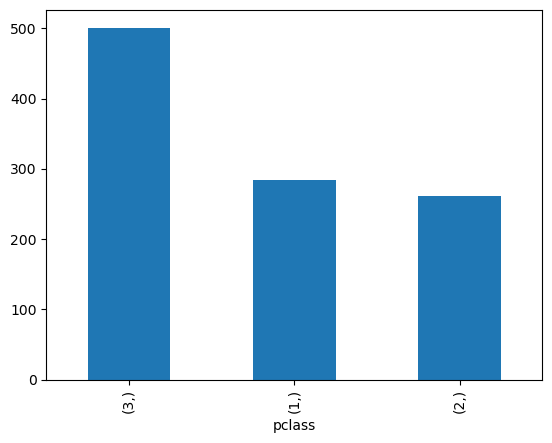

In [14]:
# Graphique en bar représentant les classes de passagers 
classes.plot.bar()

<AxesSubplot:>

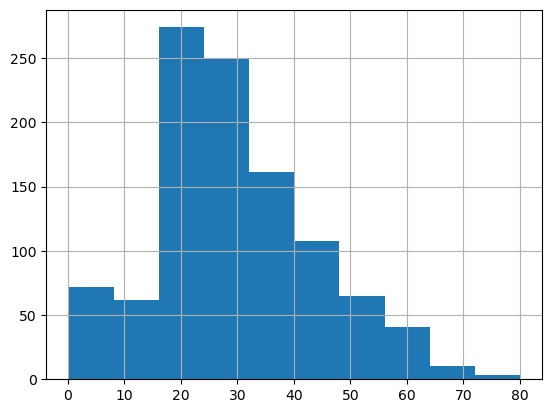

In [15]:
# Répartition des âges suivant un histogramme
dff['age'].hist()

In [16]:
# Analyse des passagers selon leur sexe: moyenne par sexe

dff.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [17]:
# Analyse des passagers selon leur sexe et leur classe

dff.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [19]:
# Repartition des passagers par sexe
dff.value_counts(['sex'])

sex   
male      658
female    388
dtype: int64

In [22]:
# indexation à l'aide des données d'une autre colonne
dat = data.set_index('name')
dat['age']

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

In [25]:
# Sélection de passagers mineurs
dff[dff['age'] < 18]

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
55,1,1,female,14.0000
...,...,...,...,...
1265,3,0,female,10.0000
1275,3,0,male,16.0000
1279,3,0,female,14.0000
1300,3,1,female,15.0000


In [26]:
# Les passagers mineurs par classe
dff[dff['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [28]:
# Passagers mineurs selon le sexe et la classe
dff[dff['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [29]:
# Index localisation
dff.iloc[0:5, 0:5]

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [31]:
# Index localisation sur des colonnes bien définies
dff.loc[0:5, ['age', 'sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female
3,30.0000,male
4,25.0000,female
5,48.0000,male


In [37]:
age_categories = np.zeros((dff.shape[0], 1))

index = 0
for age in dff['age'] :
    if age < 20 :
        age_categories[index] = '1'
    elif (age >= 20) & (age < 30 ) :
        age_categories[index] = '2'
    elif (age >= 30) & (age < 40 ) :
        age_categories[index] = '3'
    else :
        age_categories[index] = '4'
    index += 1

# print(age_categories)
dff['age_categories'] = age_categories

C:\Users\asus\AppData\Local\Temp\ipykernel_9788\274996966.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['age_categories'] = age_categories


In [39]:
dff.head()

,pclass,survived,sex,age,age_categories
0,1,1,female,29.0000,2.0
1,1,1,male,0.9167,1.0
2,1,0,female,2.0000,1.0
3,1,0,male,30.0000,3.0
4,1,0,female,25.0000,2.0


In [41]:
dff['age_categories'].value_counts()

2.0    344
4.0    245
3.0    232
1.0    225
Name: age_categories, dtype: int64

Autre procédure

In [120]:
df = df.dropna(axis = 0)
df.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [122]:
df.loc[df['age'] < 20, 'age'] = 1
df.loc[(df['age'] >= 20) & (df['age'] < 30) , 'age'] = 2
df.loc[(df['age'] >= 30) & (df['age'] < 40) , 'age'] = 3
df.loc[(df['age'] >= 40) , 'age'] = 4

In [123]:
df.head()

,pclass,survived,sex,age
0,1,1,female,2.0
1,1,1,male,1.0
2,1,0,female,1.0
3,1,0,male,3.0
4,1,0,female,2.0


In [124]:
df['age'].value_counts()

2.0    344
4.0    245
3.0    232
1.0    225
Name: age, dtype: int64

In [127]:
df.groupby(['age']).mean()

,pclass,survived
age,,
1.0,2.542222,0.471111
2.0,2.436047,0.369186
3.0,2.103448,0.422414
4.0,1.677551,0.391837


Une dernière procédure! Résolution du problème avec la fonction map(). Elle permet d'appliquer une autre fonction à une colonne

#### Transformer des données de type 'string' en données numériques

In [128]:
# Fonction map() : aucune modification du dataframe originelle
df['sex'].map({'male':0, 'female':1})

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [129]:
# Affichage
df.head()

,pclass,survived,sex,age
0,1,1,female,2.0
1,1,1,male,1.0
2,1,0,female,1.0
3,1,0,male,3.0
4,1,0,female,2.0


In [131]:
# Fonction replace()
df ['sex'].replace(['male', 'female'], [0, 1])

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [132]:
# Catégories de sexes
df ['sex'].astype('category')

0       female
1         male
2       female
3         male
4       female
         ...  
1301      male
1304    female
1306      male
1307      male
1308      male
Name: sex, Length: 1046, dtype: category
Categories (2, object): ['female', 'male']

In [134]:
df ['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8

### Bitcoin et TimeSeries

In [3]:
bitcoin = pd.read_csv('BTC-EUR.csv')

In [43]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


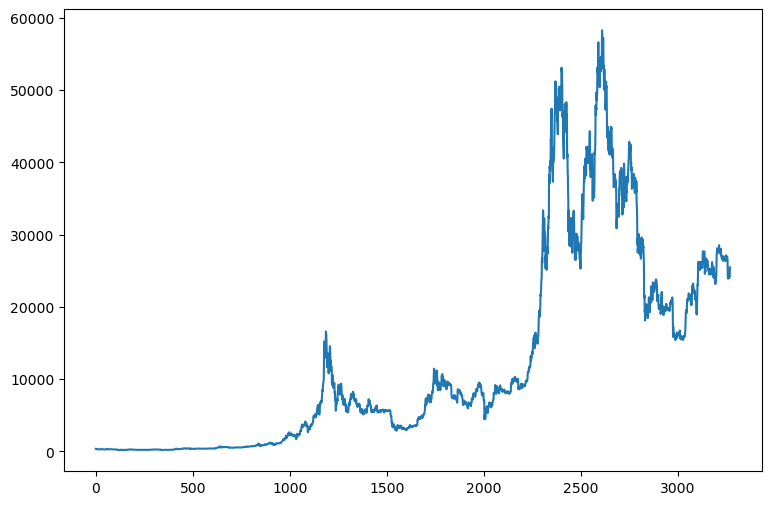

In [45]:
# L'évolution du prix de clôture

bitcoin['Close'].plot(figsize = (9, 6))
plt.show()

En abscisse, on a les on index et non les dates

In [46]:
bitcoin.shape

(3269, 7)

In [50]:
bitcoin.index

RangeIndex(start=0, stop=3269, step=1)

In [4]:
# Définissons un nouveau index: le DateTimeIndex
bitcoin = pd.read_csv('BTC-EUR.csv', index_col = 'Date', parse_dates = True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


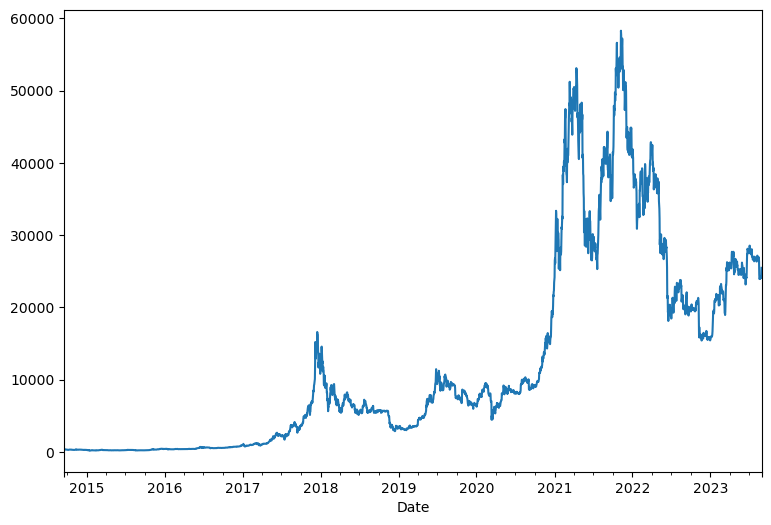

In [52]:
bitcoin['Close'].plot(figsize = (9, 6))
plt.show()

In [53]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-08-20', '2023-08-21', '2023-08-22', '2023-08-23',
               '2023-08-24', '2023-08-25', '2023-08-26', '2023-08-27',
               '2023-08-28', '2023-08-29'],
              dtype='datetime64[ns]', name='Date', length=3269, freq=None)

C:\Users\asus\AppData\Local\Temp\ipykernel_9788\391364160.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].plot(figsize = (9, 6))


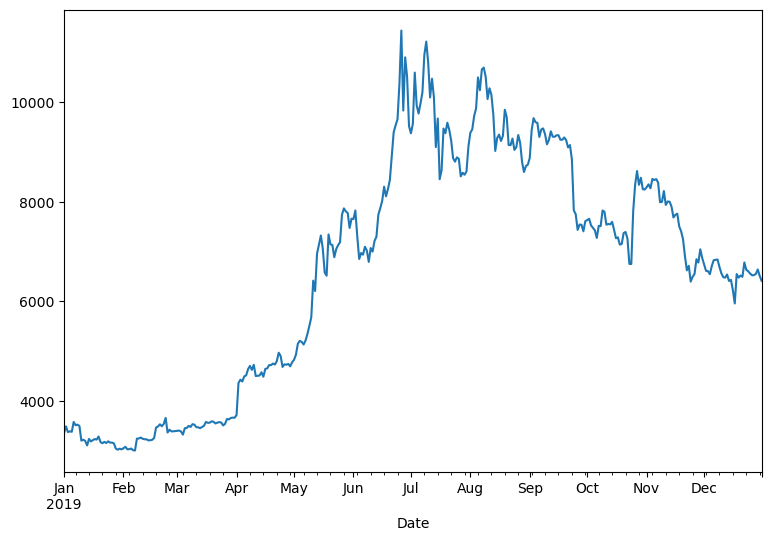

In [54]:
# Evolution du bitcoin en 2019
bitcoin['2019']['Close'].plot(figsize = (9, 6))
plt.show()

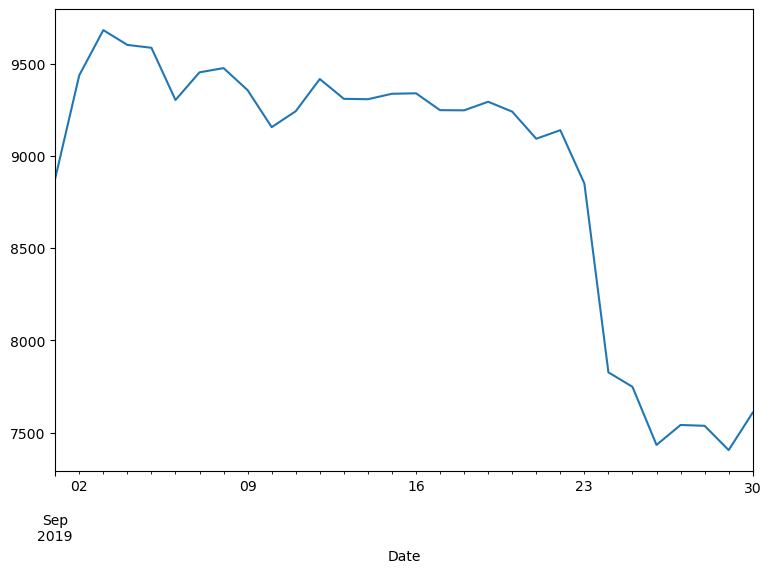

In [59]:
# Evolution du bitcoin en septembre 2019
bitcoin.loc['2019-09', 'Close'].plot(figsize = (9, 6))
plt.show()

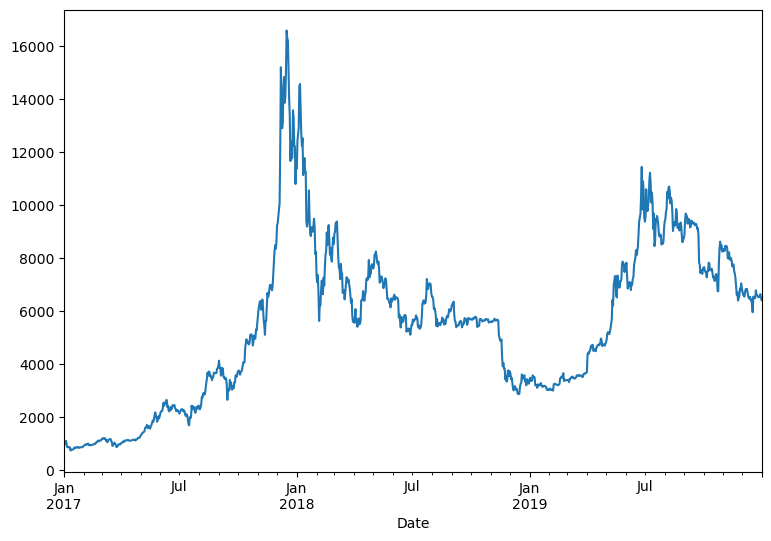

In [58]:
# Evolution du bitcoin entre 2017 et 2019
bitcoin['2017':'2019']['Close'].plot(figsize = (9, 6))
plt.show()

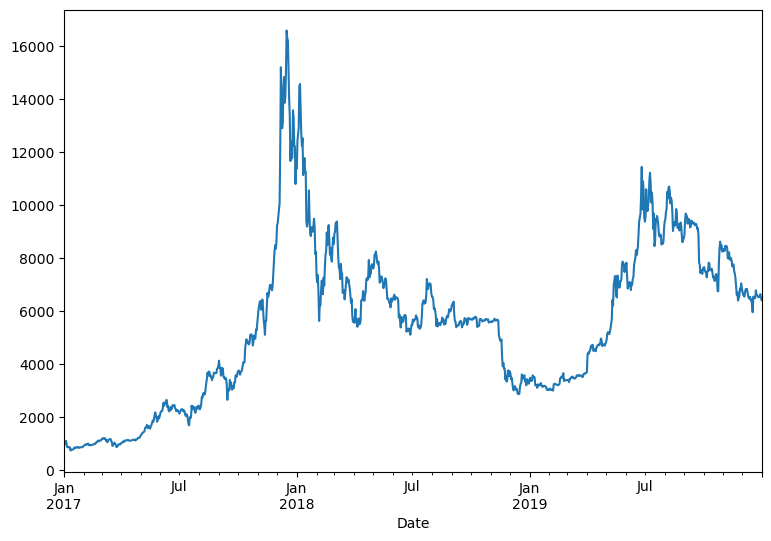

In [60]:
# Evolution du bitcoin entre 2017 et 2019
bitcoin.loc['2017':'2019', 'Close'].plot(figsize = (9, 6))
plt.show()

In [63]:
# Conversion d'une string en date

pd.to_datetime('07/10/1998 07:07:30.45')

Timestamp('1998-07-10 07:07:30.450000')

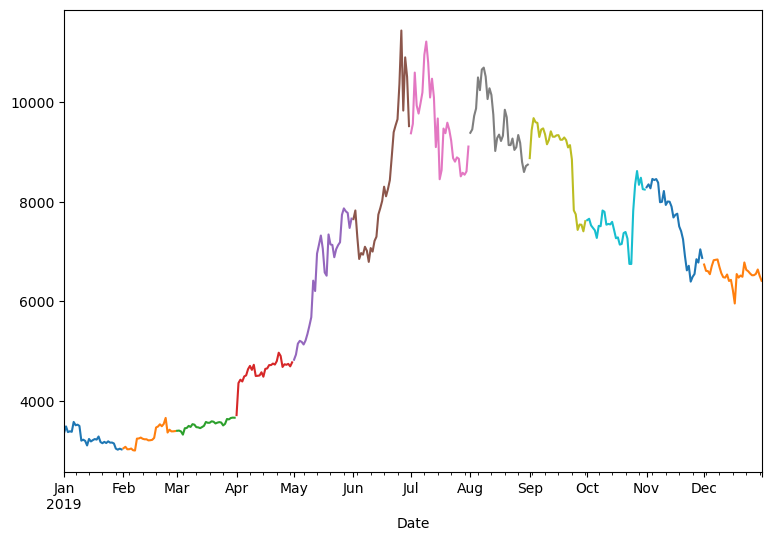

In [65]:
# Pour le regroupement des données ous forme de fréquence temporelle, on utilise la fonction resample()
# Regroupement par mois
bitcoin.loc['2019', 'Close'].resample('M').plot(figsize = (9, 6))
plt.show()

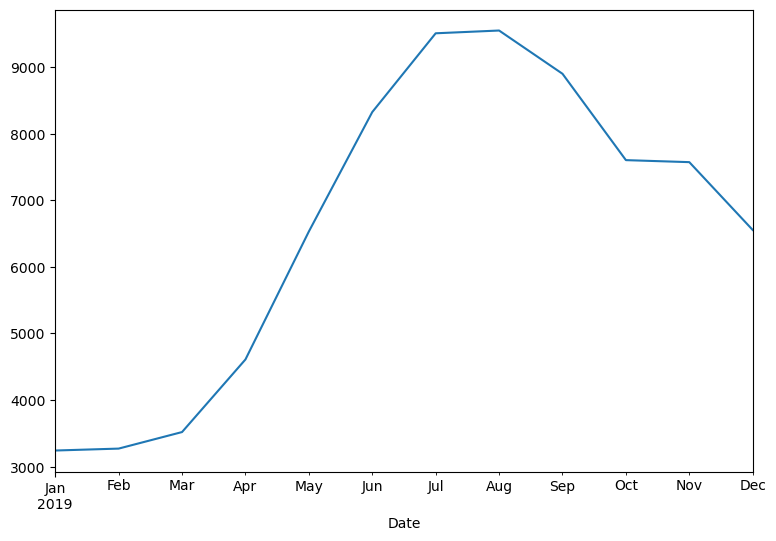

In [66]:
# Evolution moenne mensuelle
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(figsize = (9, 6))
plt.show()

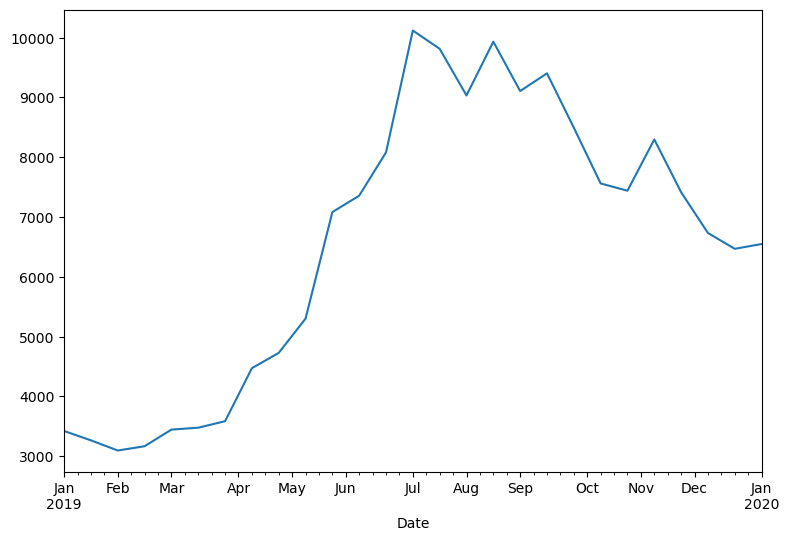

In [67]:
# Evolution moyenne toutes les deux semaines
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot(figsize = (9, 6))
plt.show()

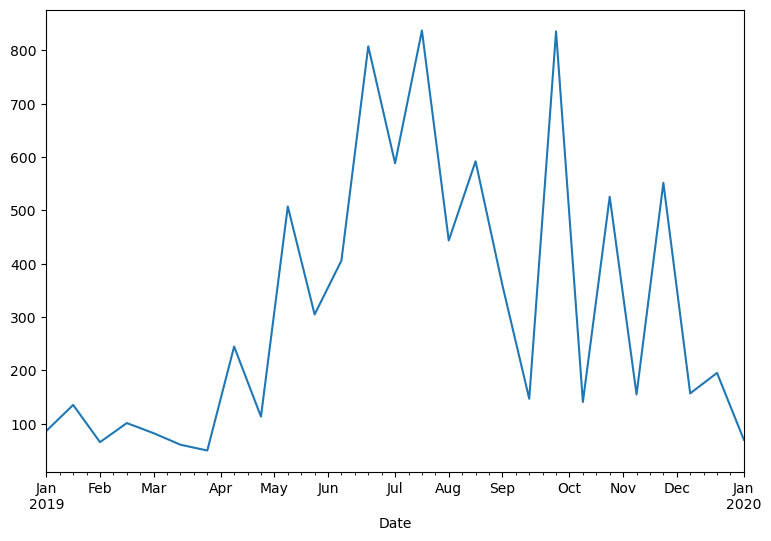

In [68]:
# Volatilité du bitcoin
# Evolution moenne toutes les deux semaines
bitcoin.loc['2019', 'Close'].resample('2W').std().plot(figsize = (9, 6))
plt.show()

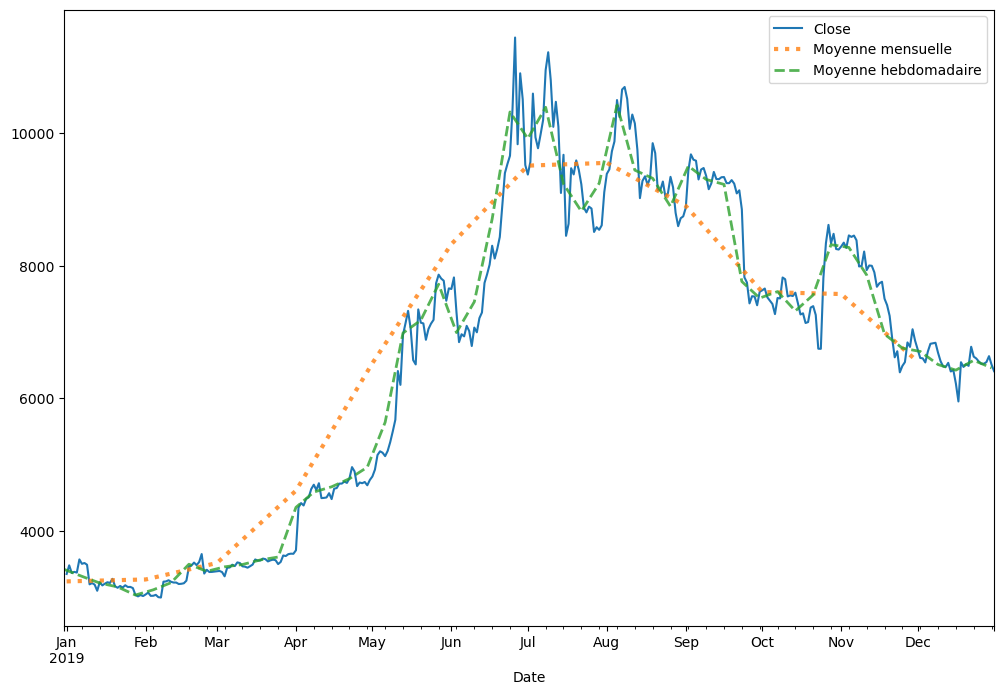

In [70]:
# Affichage de tous ces graphiques sur une même figure

plt.figure(figsize = (12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label = 'Moyenne mensuelle', lw = 3, ls = ':', alpha = 0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label = 'Moyenne hebdomadaire', lw = 2, ls = '--', alpha = 0.8)
plt.legend()
plt.show()

In [71]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Date,,,,
2019-01-06,3422.916626,86.768296,3353.505859,3572.601807
2019-01-13,3317.593401,180.066248,3100.221680,3518.607910
2019-01-20,3216.173340,36.646566,3168.373535,3280.021484
2019-01-27,3157.861154,15.218334,3140.374756,3183.176025
2019-02-03,3035.448347,19.472269,3015.454102,3073.150146
2019-02-10,3114.468541,123.483779,2998.157227,3258.583740
2019-02-17,3222.201835,17.498269,3202.042725,3252.190186
2019-02-24,3500.129360,88.628342,3359.558594,3653.833008
2019-03-03,3392.695312,12.224585,3381.982910,3416.384521


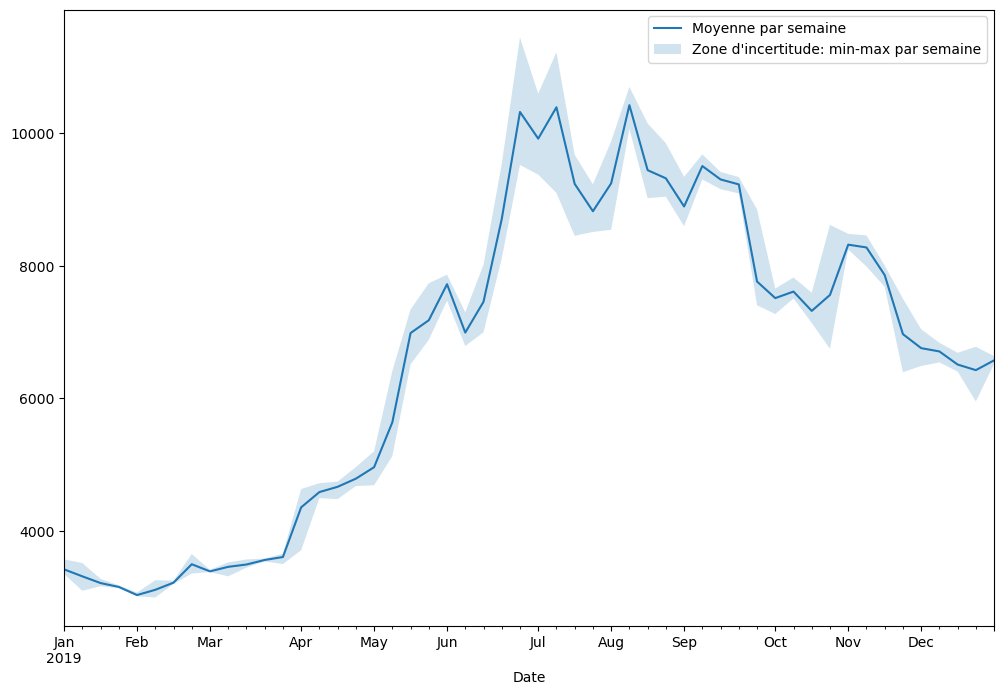

In [5]:
stat = bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize = (12, 8))
stat['mean']['2019'].plot(label = 'Moyenne par semaine')
plt.fill_between(stat.index, stat['max'], stat['min'], alpha = 0.2, label = 'Zone d\'incertitude: min-max par semaine')
plt.legend()
plt.show()

La moyenne mobile : moyenne définie sur des fenêtres de valeurs

<AxesSubplot:xlabel='Date'>

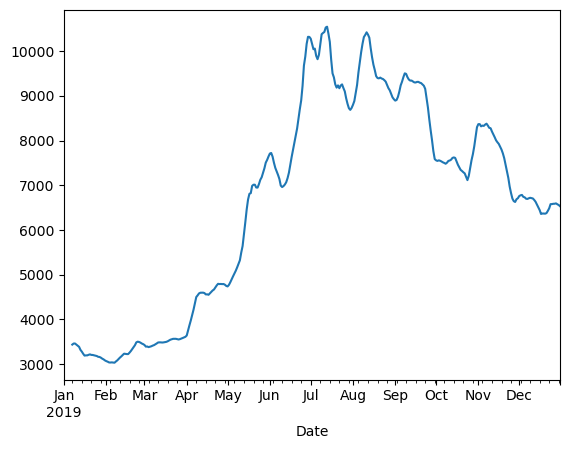

In [76]:
bitcoin.loc['2019', 'Close'].rolling(window = 7).mean().plot()

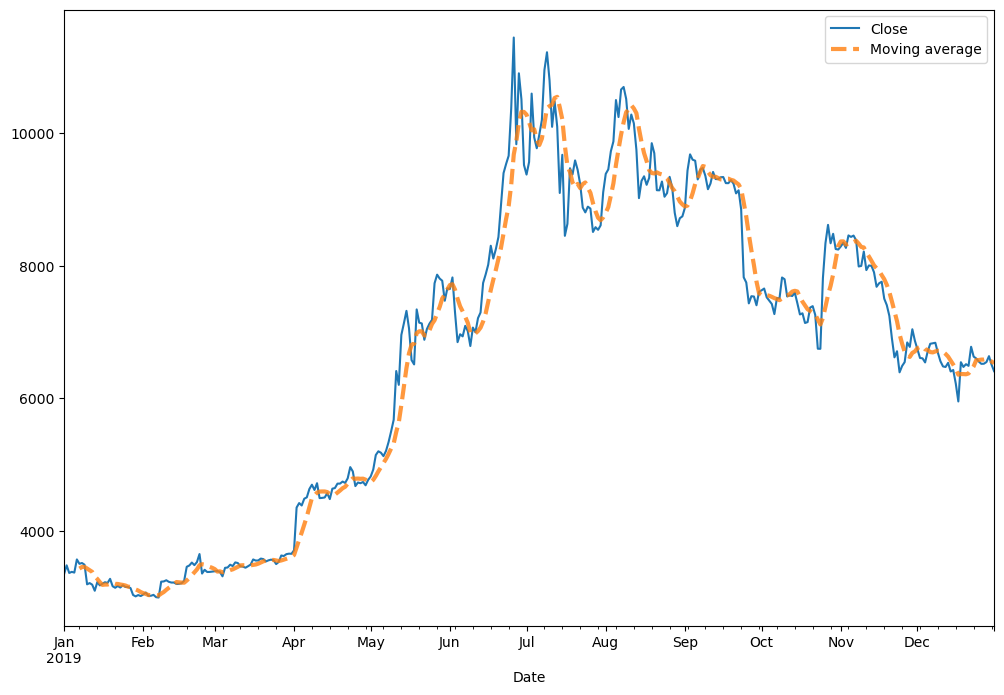

In [79]:
plt.figure(figsize = (12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window = 7).mean().plot(label = 'Moving average', lw = 3, ls = '--', alpha = 0.8)
plt.legend()
plt.show()

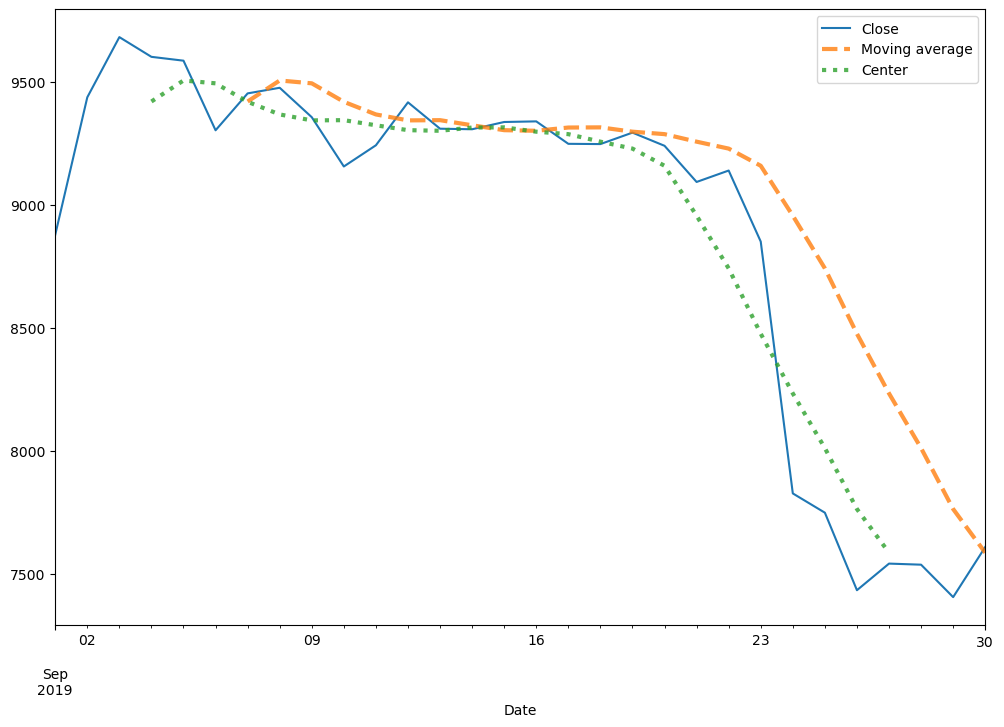

In [81]:
plt.figure(figsize = (12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window = 7).mean().plot(label = 'Moving average', lw = 3, ls = '--', alpha = 0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window = 7, center = True).mean().plot(label = 'Center', lw = 3, ls = ':', alpha = 0.8)
plt.legend()
plt.show()

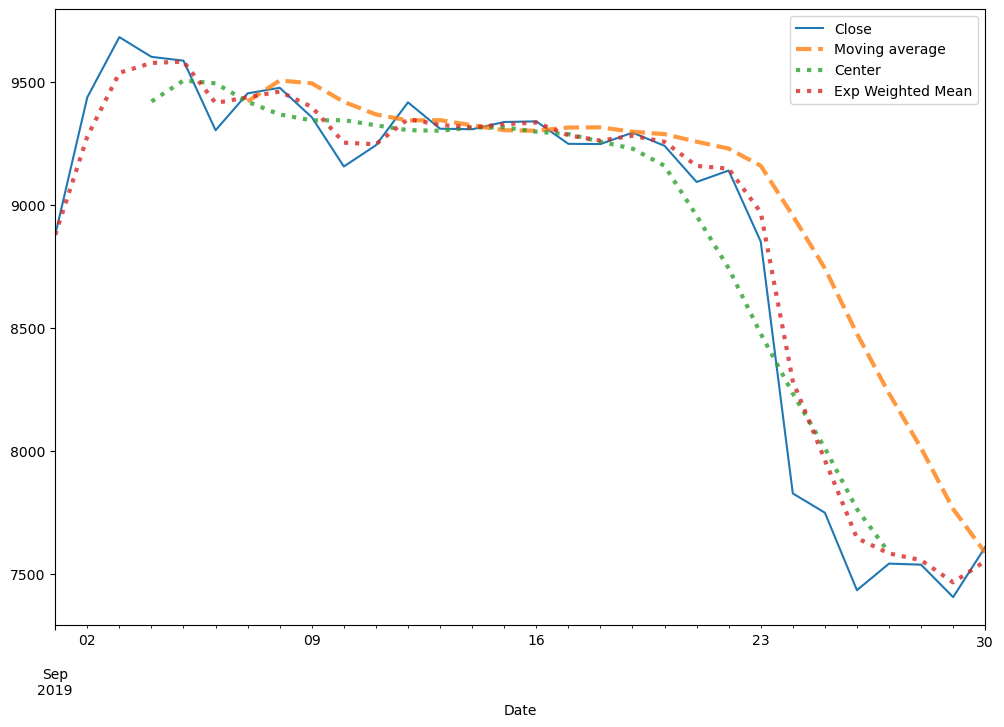

In [89]:
plt.figure(figsize = (12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window = 7).mean().plot(label = 'Moving average', lw = 3, ls = '--', alpha = 0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window = 7, center = True).mean().plot(label = 'Center', lw = 3, ls = ':', alpha = 0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha = 0.6).mean().plot(label = 'Exp Weighted Mean', lw = 3, ls = ':', alpha = 0.8)
plt.legend()
plt.show()

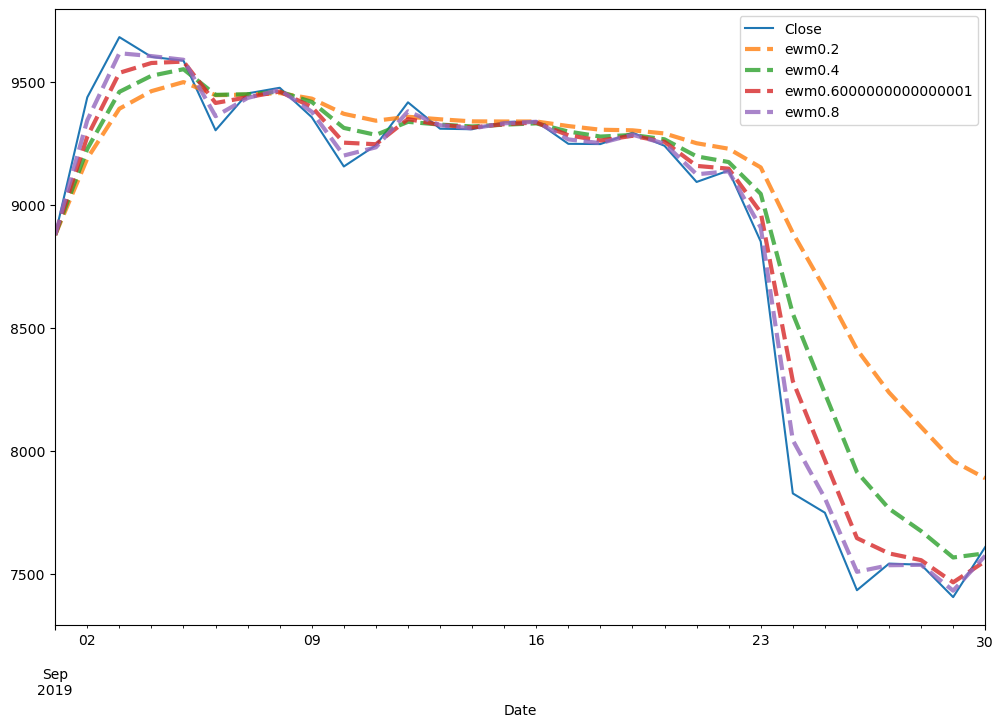

In [90]:
# Comparaison de ewm pour différentes valeurs de alpha 

plt.figure(figsize = (12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2) :
    bitcoin.loc['2019-09', 'Close'].ewm(alpha = i).mean().plot(label = f'ewm{i}', lw = 3, ls = '--', alpha = 0.8)
plt.legend()
plt.show()

### Combinaison de deux datasets : assemblage du bitcoin et de l'ethereum

In [6]:
# Dataset de l'ethereum
ethereum = pd.read_csv('ETH-EUR.csv', index_col = 'Date', parse_dates = True)
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


<AxesSubplot:xlabel='Date'>

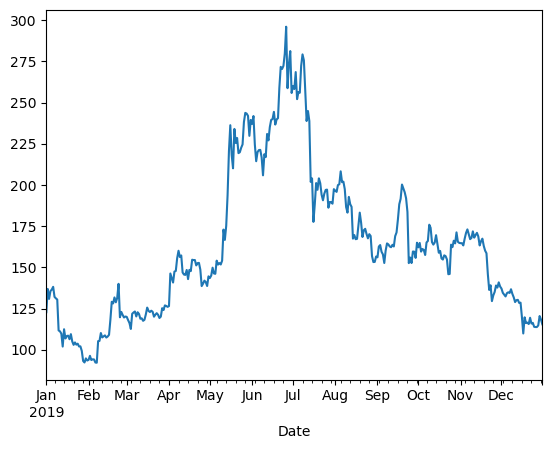

In [93]:
# Evolution de l'éthereum en 2019

ethereum.loc['2019', 'Close'].plot()

In [7]:
# Combinaison de données 
df_inner = pd.merge(bitcoin, ethereum, on = 'Date', how = 'inner', suffixes = ('.btc', '.eth'))
df_inner.head()
# Seules les données ayant des index communs sont combinées

,Open.btc,High.btc,Low.btc,Close.btc,Adj Close.btc,Volume.btc,Open.eth,High.eth,Low.eth,Close.eth,Adj Close.eth,Volume.eth
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


In [8]:
# Combinaison de données
df_outer = pd.merge(bitcoin, ethereum, on = 'Date', how = 'outer', suffixes = ('.btc', '.eth'))
df_outer.head()
# Toutes les données, quelques soient index sont combinées

,Open.btc,High.btc,Low.btc,Close.btc,Adj Close.btc,Volume.btc,Open.eth,High.eth,Low.eth,Close.eth,Adj Close.eth,Volume.eth
Date,,,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Combinaison de données
df_inner = pd.merge(bitcoin, ethereum, on = 'Date', how = 'inner', suffixes = ('.btc', '.eth'))
df_inner.head()

,Open.btc,High.btc,Low.btc,Close.btc,Adj Close.btc,Volume.btc,Open.eth,High.eth,Low.eth,Close.eth,Adj Close.eth,Volume.eth
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


In [10]:
# Combinaison de données
df_left = pd.merge(bitcoin, ethereum, on = 'Date', how = 'left', suffixes = ('.btc', '.eth')) # left outer join
df_left.head() 

,Open.btc,High.btc,Low.btc,Close.btc,Adj Close.btc,Volume.btc,Open.eth,High.eth,Low.eth,Close.eth,Adj Close.eth,Volume.eth
Date,,,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Combinaison de données
df_right = pd.merge(bitcoin, ethereum, on = 'Date', how = 'right', suffixes = ('.btc', '.eth')) # right outer join
df_right.head()

,Open.btc,High.btc,Low.btc,Close.btc,Adj Close.btc,Volume.btc,Open.eth,High.eth,Low.eth,Close.eth,Adj Close.eth,Volume.eth
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


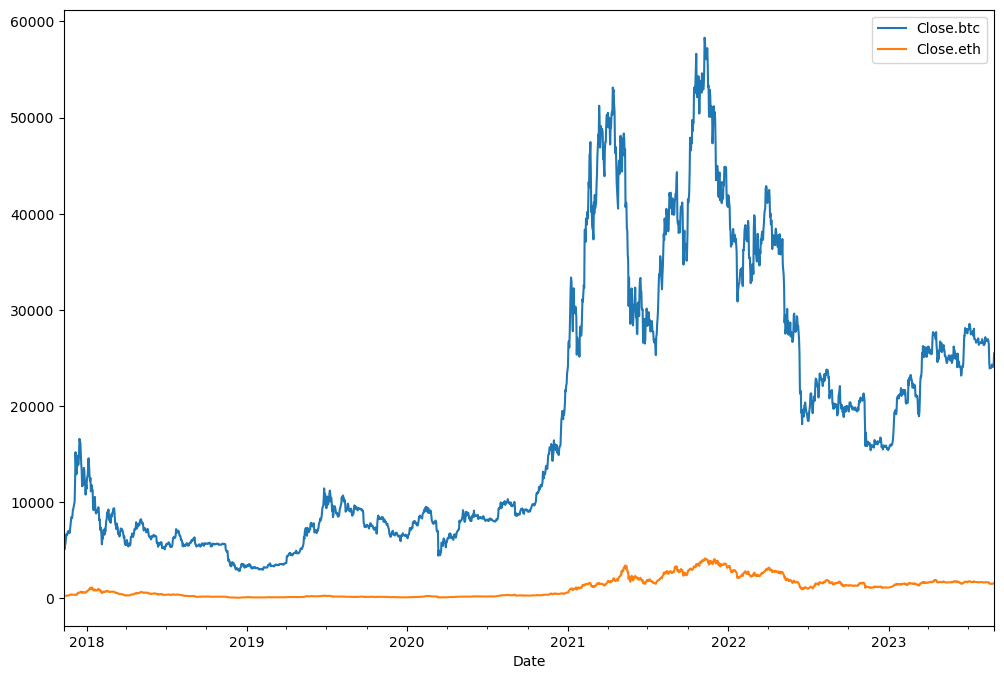

In [12]:
df_inner[['Close.btc', 'Close.eth']].plot(figsize = (12, 8))
plt.show()

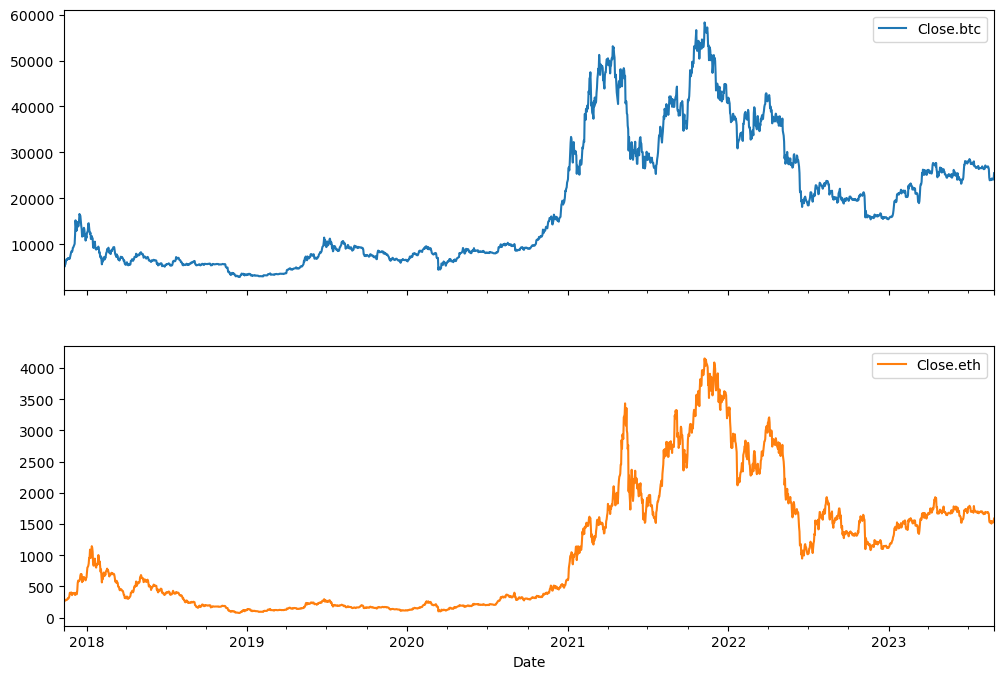

In [108]:
# Mise des datasets à la même échelle par la technique de subplot
df_inner[['Close.btc', 'Close.eth']].plot(subplots = True, figsize = (12, 8))
plt.show()

In [110]:
df_inner[['Close.btc', 'Close.eth']].corr() # Matrice de corrélation

,Close.btc,Close.eth
Close.btc,1.000000,0.928936
Close.eth,0.928936,1.000000


In [116]:
# Correlation pour sept 2019
mat_corr = df_inner[['Close.btc', 'Close.eth']]['2019-09'].corr()

C:\Users\asus\AppData\Local\Temp\ipykernel_9788\2792524680.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mat_corr = df_inner[['Close.btc', 'Close.eth']]['2019-09'].corr()


<AxesSubplot:>

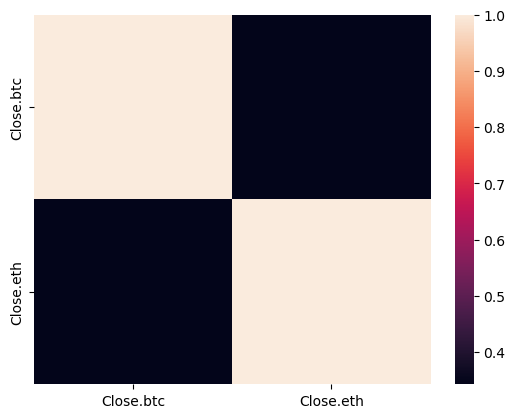

In [117]:
# Représentation
import seaborn as sns
sns.heatmap(mat_corr)

### Exercice: traging strategy

<AxesSubplot:xlabel='Date'>

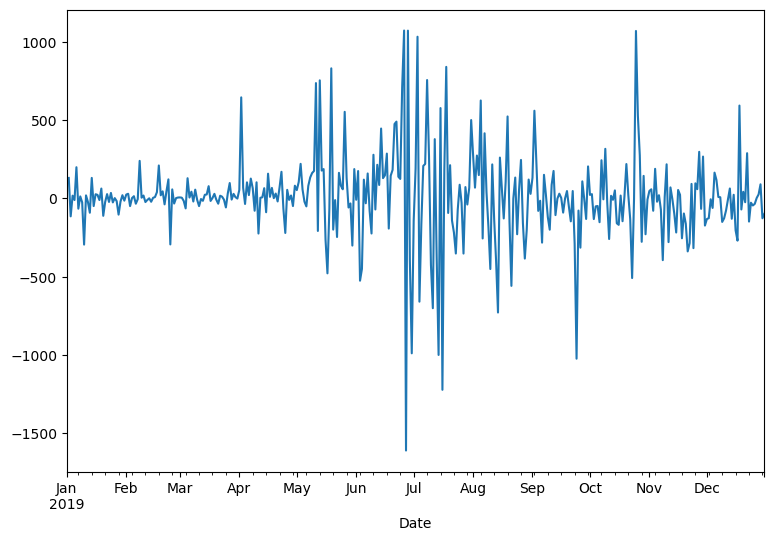

In [118]:
# Variation du bitcoin au jour le jour
# Le bitcoin est tès volatile!
bitcoin.loc['2019', 'Close'].diff().plot(figsize = (9, 6))

<AxesSubplot:xlabel='Date'>

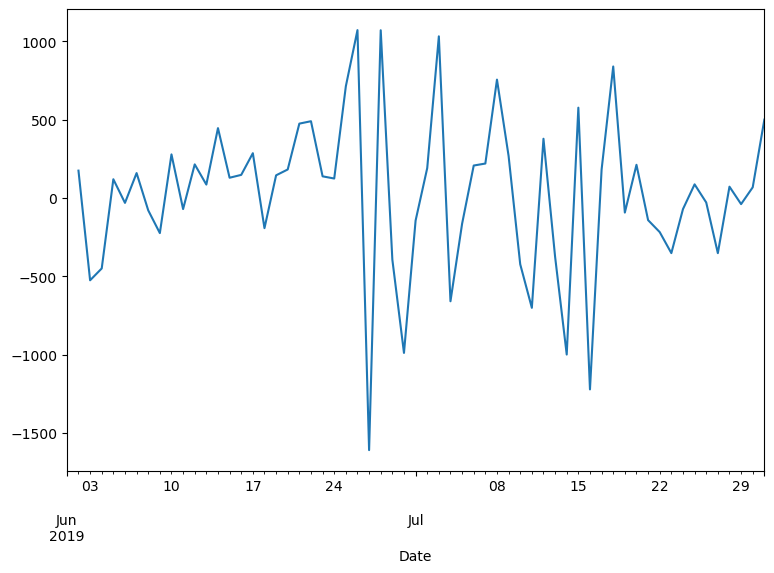

In [119]:
# Volatilité pour juin-juillet
bitcoin.loc['2019-06' : '2019-07', 'Close'].diff().plot(figsize = (9, 6))

In [2]:
%matplotlib

Using matplotlib backend: <object object at 0x00000198F9104270>


In [13]:
btc = bitcoin.copy() # une copie de la dataset
btc['Buy'] = np.zeros(len(btc))
btc['Sell'] = np.zeros(len(btc))

In [14]:
btc['RollingMax'] = btc['Close'].shift(1).rolling(window = 28).max() # shift(1) : décallage des fenêtres de 1 jour
btc['RollingMin'] = btc['Close'].shift(1).rolling(window = 28).min()
btc.loc[btc['RollingMax'] < btc['Close'], 'Buy'] = 1
btc.loc[btc['RollingMin'] > btc['Close'], 'Sell'] = -1

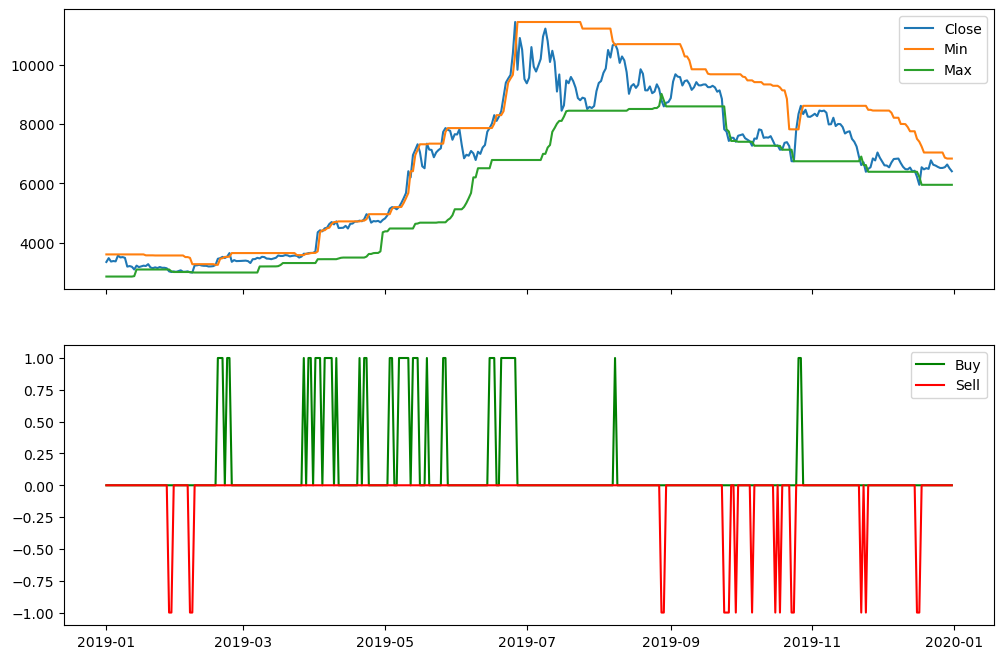

In [15]:
start = '2019'
end = '2019'

fig, ax = plt.subplots(2, figsize = (12, 8), sharex = True) # méthode oop, partage de l'axe
# plt.figure(figsize = (12, 8))
# plt.subplot(2, 1, 1)

ax[0].plot(btc['Close'][start : end])
ax[0].plot(btc['RollingMax'][start : end])
ax[0].plot(btc['RollingMin'][start : end])
ax[0].legend(['Close', 'Min', 'Max'])

ax[1].plot(btc['Buy'][start : end], c = 'g')
ax[1].plot(btc['Sell'][start : end], c = 'r')
ax[1].legend(['Buy', 'Sell'])